In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')

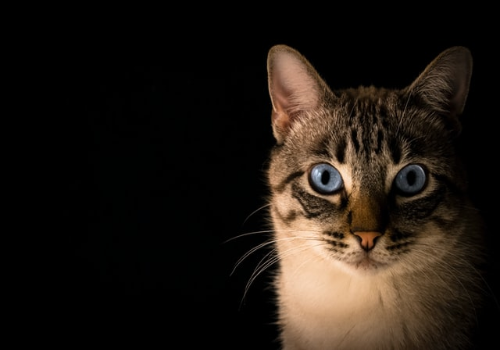

In [2]:
img = cv2.imread('/content/drive/MyDrive/Datasets/cat.jpg')
cv2_imshow(cv2.resize(img, (500, 350)))

#### Convert to list of pexels

In [3]:
np.array([[1,2],[3,4]]).reshape(4)

array([1, 2, 3, 4])

##### Reshape the img to apply kmeans on it (kmeans applied on 2D)

In [4]:
img_arr = img.reshape(img.shape[0] * img.shape[1], 3)
img_arr

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

##### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
img_arr = mms.fit_transform(img_arr)

##### Apply kmeans

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(img_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
# Based on k value
np.unique(km.labels_)

array([0, 1, 2], dtype=int32)

In [8]:
centroids = km.cluster_centers_
centroids

array([[0.00709168, 0.01261692, 0.01622035],
       [0.51823831, 0.69659589, 0.80705559],
       [0.21303206, 0.32289361, 0.39969408]])

##### Define number/sequence of bins

In [9]:
numLabels = np.arange(0, len(np.unique(km.labels_)) + 1)
numLabels

array([0, 1, 2, 3])

##### Create histogram

In [10]:
# bins: int or sequence of str defines number of equal width bins in a range, default is 10
# _: an array of float datatype containing the bin edges having length one more than the hist.
# hist: Gives the array of values of the histogram

hist, _ = np.histogram(km.labels_, bins = numLabels)
print(hist)
hist = hist.astype("float")
hist /= hist.sum() # normalize
print(hist)

[216577  21575  35128]
[0.79250951 0.07894833 0.12854215]


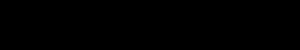

In [11]:
bar = np.zeros((50, 300, 3), dtype = "uint8")
cv2_imshow(bar)

[1, 3, 4]
[132, 165, 205]
[54, 76, 101]


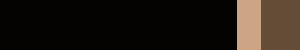

In [12]:
# centroid is the minmax scaled value(position on graph) of the most dominant color
startX = 0

for (percent, color) in zip(hist, mms.inverse_transform(centroids)):
  endX = startX + (percent * 300)
  print(color.astype("uint8").tolist())
  cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
  startX = endX
cv2_imshow(bar)

In [13]:
def K_dominant_colors(img_name, k):
  img = cv2.imread('/content/drive/MyDrive/Datasets/'+img_name)
  cv2_imshow(cv2.resize(img, (500, 350)))
  print('\n')

  img_arr = img.reshape(img.shape[0] * img.shape[1], 3)

  from sklearn.preprocessing import MinMaxScaler
  mms = MinMaxScaler()
  img_arr = mms.fit_transform(img_arr)

  from sklearn.cluster import KMeans
  km = KMeans(n_clusters=k)
  km.fit(img_arr)

  centroids = km.cluster_centers_

  numLabels = np.arange(0, len(np.unique(km.labels_)) + 1)

  hist, _ = np.histogram(km.labels_, bins = numLabels)
  hist = hist.astype("float")
  hist /= hist.sum() # normalize

  bar = np.zeros((50, 300, 3), dtype = "uint8")

  startX = 0

  for (percent, color) in zip(hist, mms.inverse_transform(centroids)):
    endX = startX + (percent * 300)
    cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
    startX = endX
  cv2_imshow(bar)


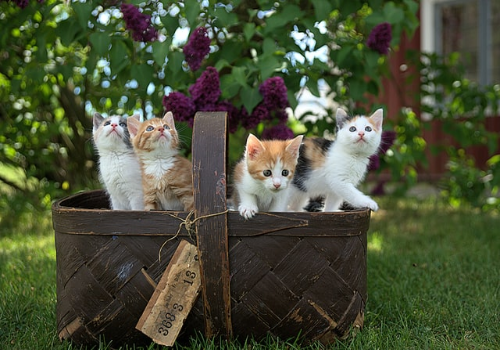

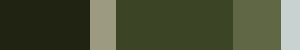

In [14]:
img = 'cats.jpg'
K_dominant_colors(img, 5)

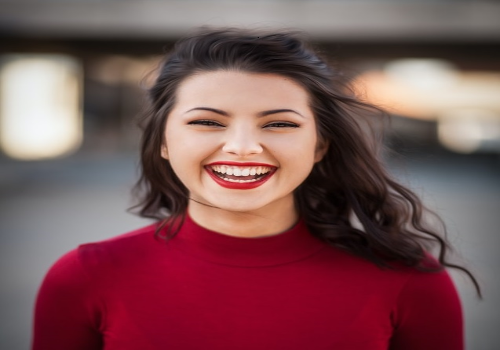

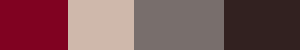

In [20]:
img = 'lady.jpg'
K_dominant_colors(img, 4)

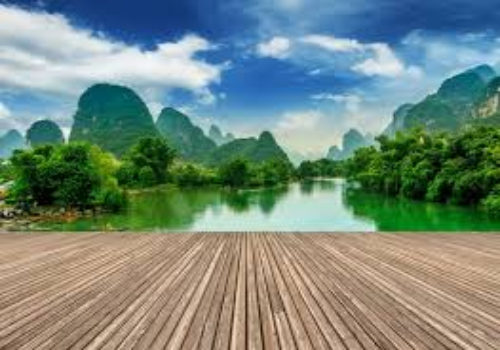

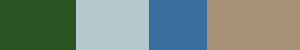

In [16]:
img = 'landscape1.jpeg'
K_dominant_colors(img, 4)

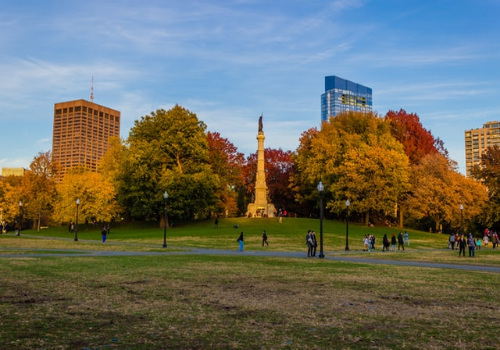

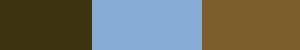

In [17]:
img = 'park.jpg'
K_dominant_colors(img, 3)

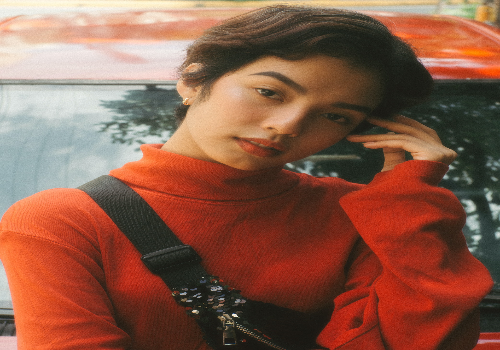

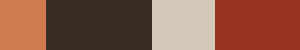

In [15]:
img = 'girl1.jpg'
K_dominant_colors(img, 4)